In [3]:

#step1: importing lib.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


In [4]:
#step2: create function for 5 fold cross validation

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred))# print classification report
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    return accuracy_score(y_true, y_pred) # return accuracy score


In [5]:
#step3: read the dataset
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")

print(df.head(5))

print(df.info())

#step4: convert text to category
df['gender']=df['gender'].astype('category').cat.codes
df["ever_married"]=df["ever_married"].astype('category').cat.codes
df["work_type"]=df["work_type"].astype('category').cat.codes
df["Residence_type"]=df["Residence_type"].astype('category').cat.codes
df["smoking_status"]=df["smoking_status"].astype('category').cat.codes
#step5: drop NaN value
df=df.dropna()

print(df.head(5))


print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [6]:

#step6: get x values which is all colms except the stork col.
x= df.drop(["stroke"],axis=1)

#step7: get y
y = df.iloc[:,11].values

#step8: split to test train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
models = pd.DataFrame(columns=["Model","Accuracy Score"])

## create DT model

In [8]:

# Step9: create DT model
clf = DecisionTreeClassifier(criterion="entropy")  # max_depth

#step10: Fit a Decision Tree model
clf.fit(X_train, y_train)
#step11: predict for test
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
score = accuracy_score(y_pred, y_test)
print(f"DecisionTree: {score}")
new_row={"Model": "DecisionTree","Accuracy Score": score}
models = models.append(new_row, ignore_index=True)


0.8981670061099797
DecisionTree: 0.8981670061099797


In [11]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
0,DecisionTree,0.898167


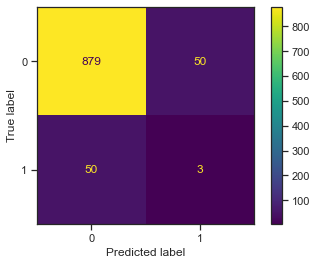

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test) )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))

disp.plot()
plt.show()

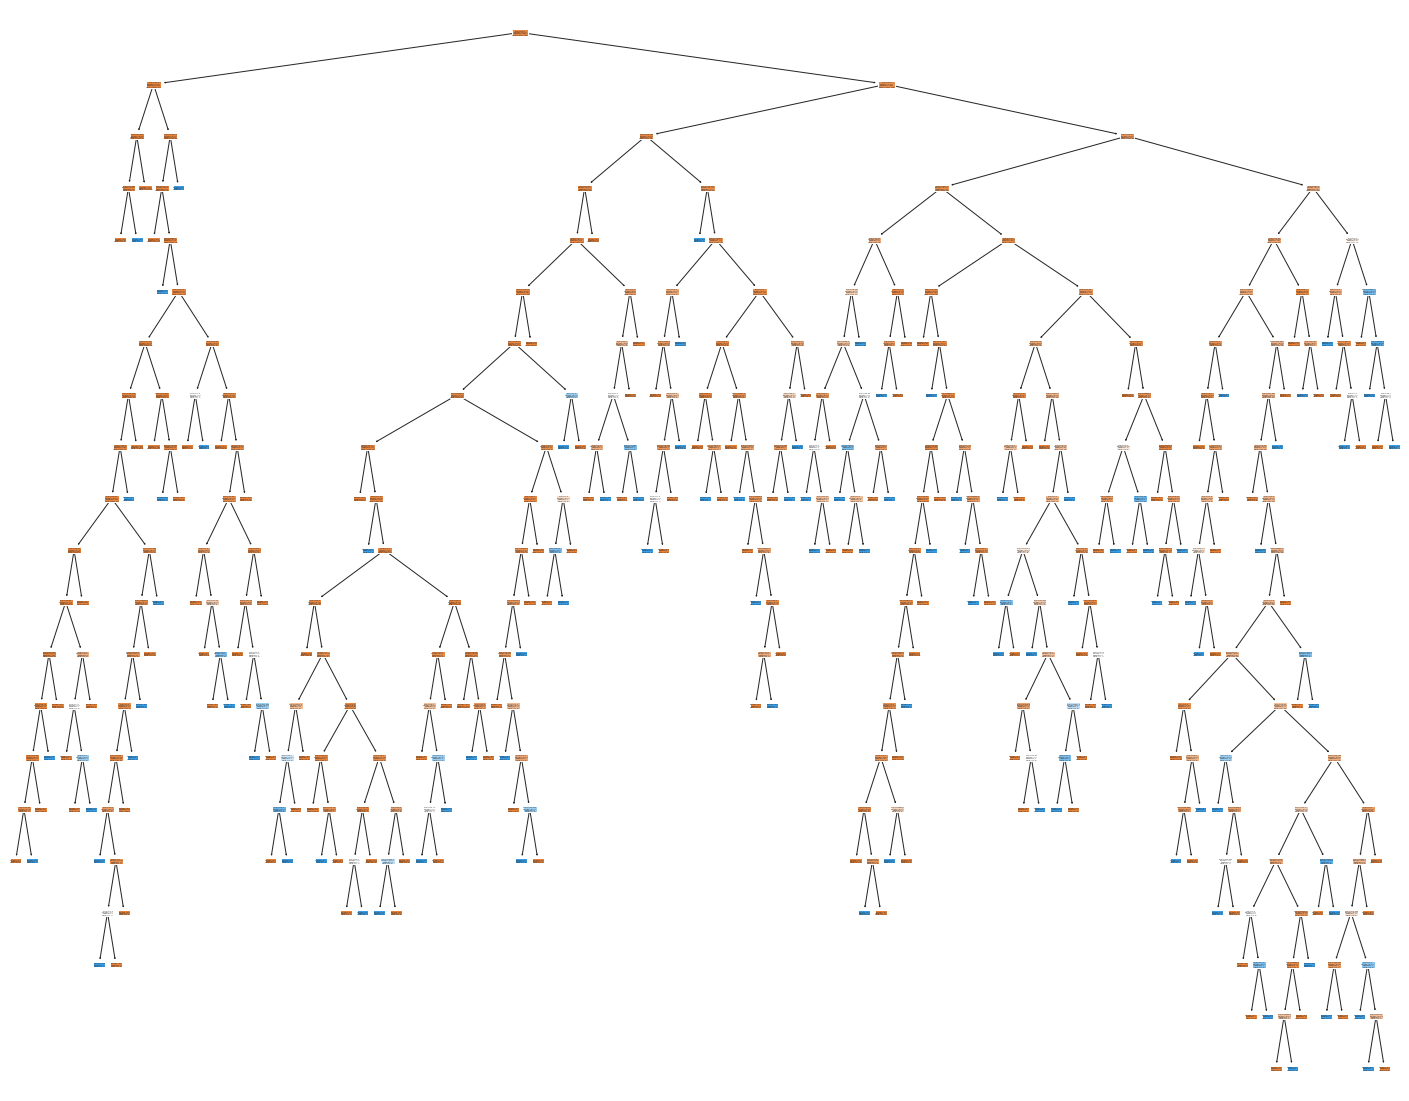

In [13]:

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)
plt.show()

In [14]:

#step12: print precision    recall  f1-score accuracy
print("=============test report================")
test_report=classification_report(y_test,y_pred)
print(test_report)
print("=============train report===============")
y_pred = clf.predict(X_train)
test_report=classification_report(y_train,y_pred)
print(test_report)

=============test report================
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.06      0.06      0.06        53

    accuracy                           0.90       982
   macro avg       0.50      0.50      0.50       982
weighted avg       0.90      0.90      0.90       982

=============train report===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927



In [15]:

#step13: 5-fold cross validation - print precision    recall  f1-score accuracy
print("+========================================================")

scores = cross_val_score(clf, x, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))


+========================================================
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       940
           1       0.09      0.12      0.10        42

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.91      0.92       982

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.13      0.14      0.14        42

    accuracy                           0.92       982
   macro avg       0.55      0.55      0.55       982
weighted avg       0.93      0.92      0.92       982

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.13      0.14      0.13        42



# RandomForestClassifier



In [16]:

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
predictions =rfc.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"RandomForestClassifier: {score}")

new_row={"Model": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

RandomForestClassifier: 0.9460285132382892


In [17]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,RandomForestClassifier,0.946029
0,DecisionTree,0.898167
